In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes_1.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 768
Number of columns: 9


In [6]:
missing_data = df.isnull().sum()
print(missing_data)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

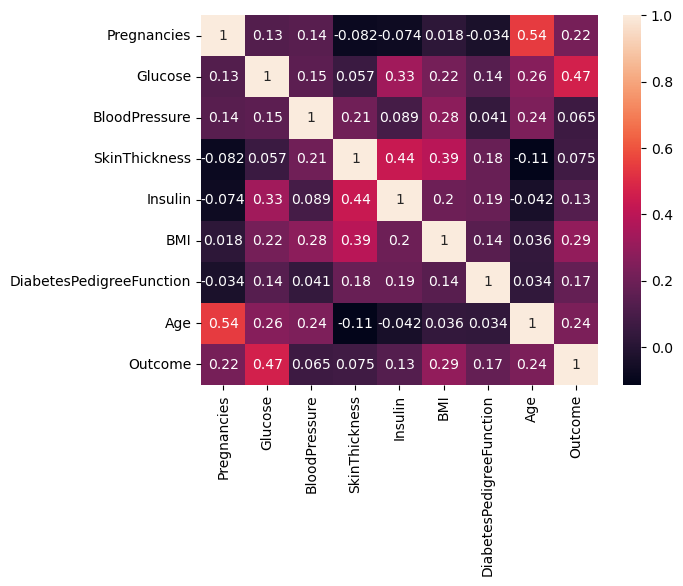

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = GaussianNB()

clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred1)
print("\nClassification Report:")
print(report)

Accuracy: 76.62%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred2 = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred2)
print("\nClassification Report:")
print(report)

Accuracy: 75.97%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [46]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

clf_rf.fit(X_train, y_train)

y_pred3 = clf_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred3)
print("\nClassification Report:")
print(report)

Random Forest Accuracy: 72.08%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [47]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=42)

clf_lr.fit(X_train, y_train)

y_pred4 = clf_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred4)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")

report = classification_report(y_test, y_pred4)
print("\nClassification Report:")
print(report)

Logistic Regression Accuracy: 75.32%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [48]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=42)

clf_dt.fit(X_train, y_train)

y_pred5 = clf_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred5)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

report = classification_report(y_test, y_pred5)
print("\nClassification Report:")
print(report)

Decision Tree Accuracy: 74.68%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [49]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

clf_gb.fit(X_train, y_train)

y_pred6 = clf_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred6)
print(f"Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%")

report = classification_report(y_test, y_pred6)
print("\nClassification Report:")
print(report)

Gradient Boosting Accuracy: 74.03%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [50]:
!pip install xgboost

In [51]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, random_state=42)

clf_xgb.fit(X_train, y_train)

y_pred7 = clf_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred7)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")

report = classification_report(y_test, y_pred7)
print("\nClassification Report:")
print(report)

XGBoost Accuracy: 74.03%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [52]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=3)

clf_knn.fit(X_train, y_train)

y_pred8 = clf_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred8)
print(f"K-NN Accuracy: {accuracy_knn * 100:.2f}%")

report = classification_report(y_test, y_pred8)
print("\nClassification Report:")
print(report)

K-NN Accuracy: 70.78%

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.61      0.51      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



C:\Users\My PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [56]:
from sklearn.metrics import mean_absolute_error
# the average of the absolute differences between the predicted and actual values.

rf_mae = mean_absolute_error(y_test, y_pred3)

gb_mae = mean_absolute_error(y_test, y_pred6)

lr_mae = mean_absolute_error(y_test, y_pred4)

nb_mae = mean_absolute_error(y_test, y_pred1)

svm_mae = mean_absolute_error(y_test, y_pred2)

knn_mae = mean_absolute_error(y_test, y_pred8)

dt_mae = mean_absolute_error(y_test, y_pred5)

xg_mae = mean_absolute_error(y_test, y_pred7)

print(f"Random Forest MAE: {rf_mae}")
print(f"Gradient Boosting MAE: {gb_mae}")
print(f"Logistic Regression MAE: {lr_mae}")
print(f"Naive Bayes MAE: {nb_mae}")
print(f"Support Vector Machine MAE: {svm_mae}")
print(f"K-NN MAE: {knn_mae}")
print(f"Decision Tree MAE: {dt_mae}")
print(f"XGBoost MAE: {xg_mae}")

Random Forest MAE: 0.2792207792207792
Gradient Boosting MAE: 0.2597402597402597
Logistic Regression MAE: 0.24675324675324675
Naive Bayes MAE: 0.23376623376623376
Support Vector Machine MAE: 0.24025974025974026
K-NN MAE: 0.2922077922077922
Decision Tree MAE: 0.2532467532467532
XGBoost MAE: 0.2597402597402597


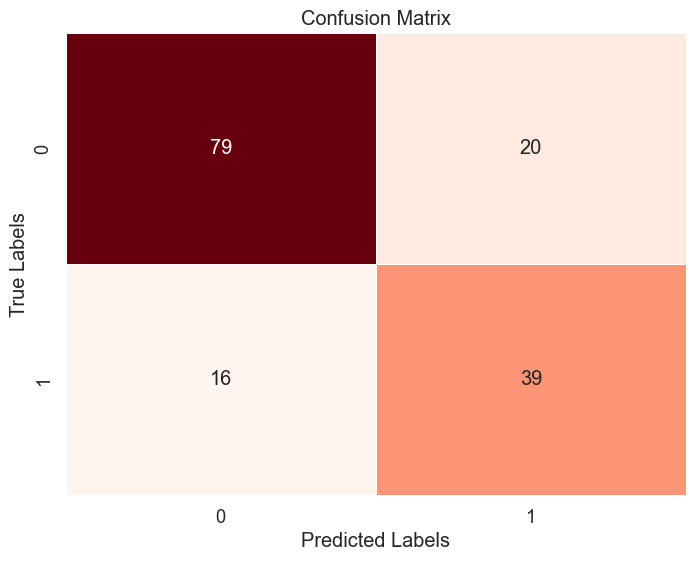

In [61]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

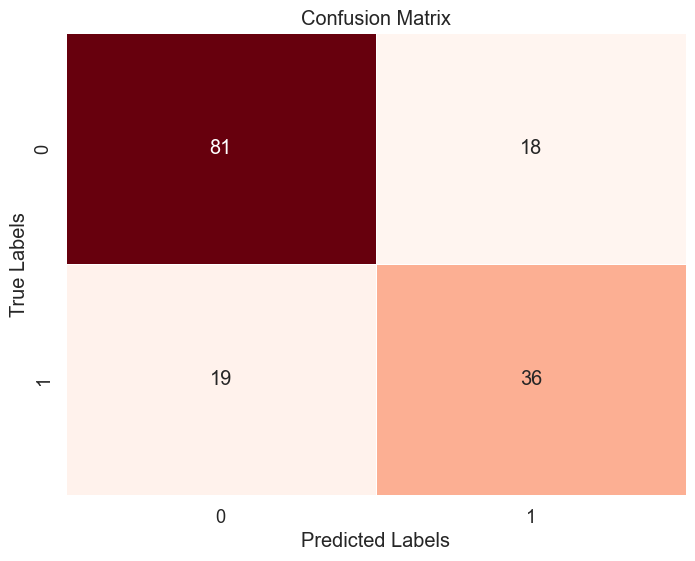

In [62]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

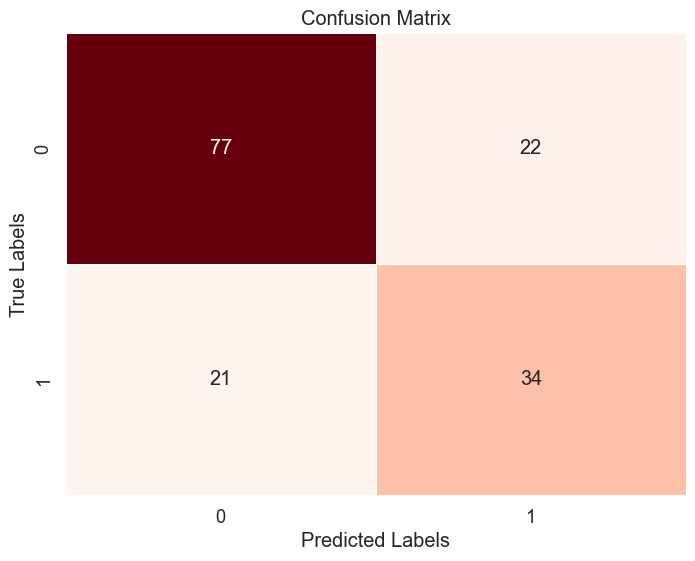

In [63]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

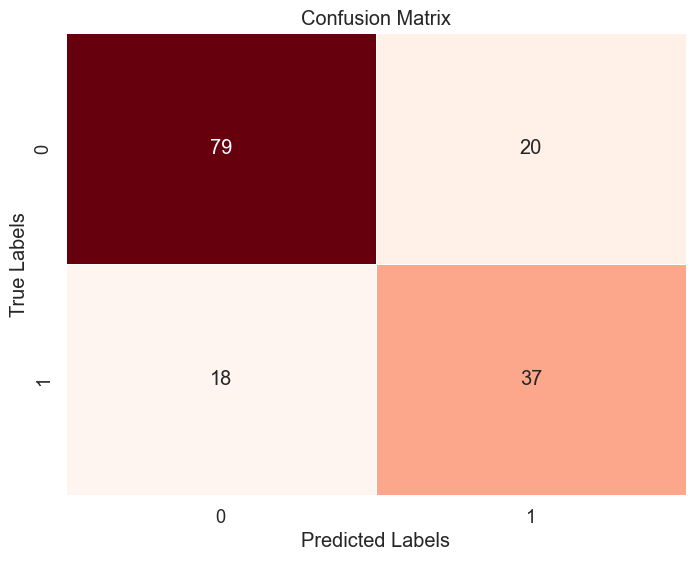

In [64]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred4)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

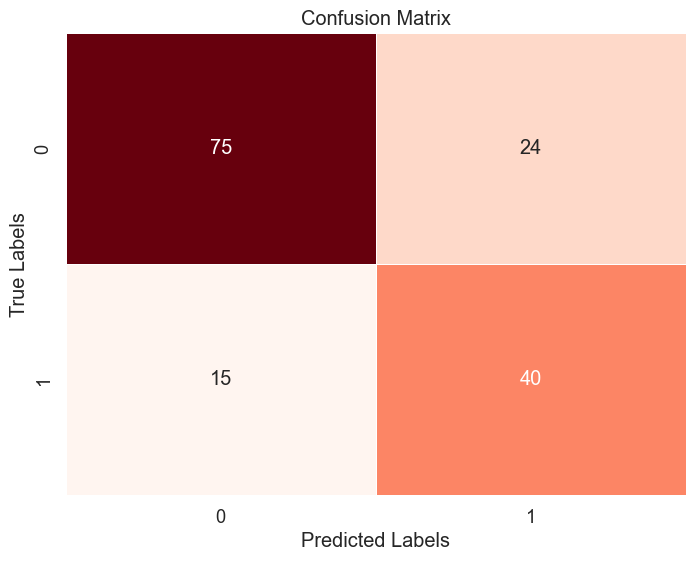

In [66]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred5)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

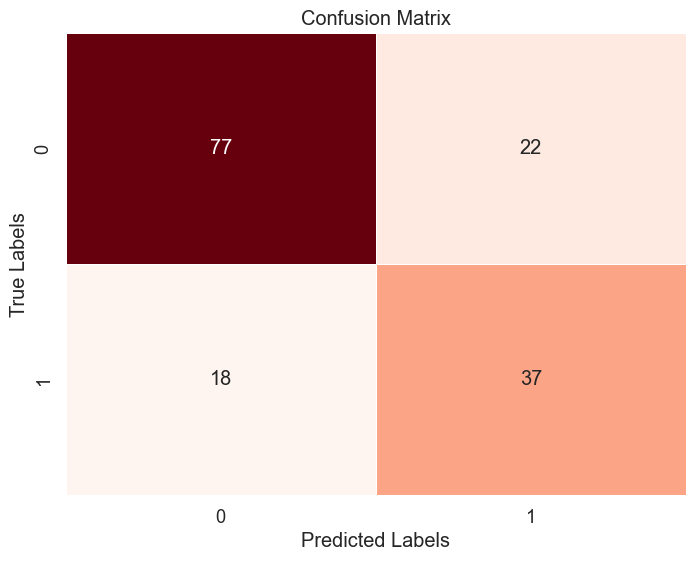

In [67]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred6)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

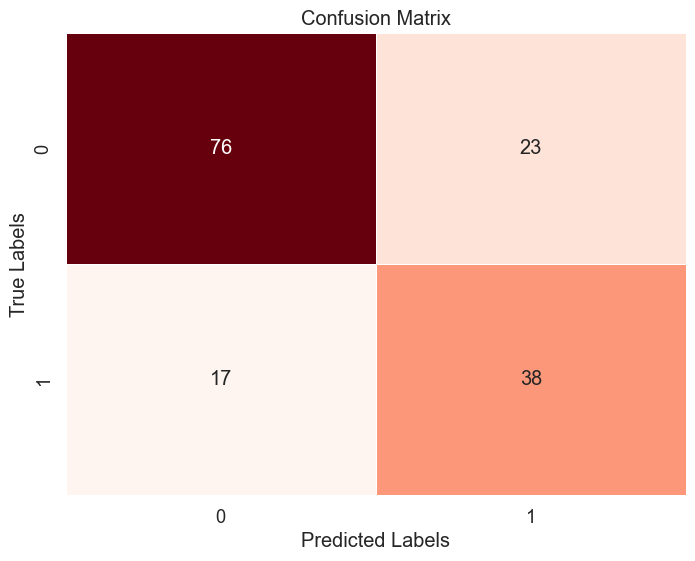

In [68]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred7)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

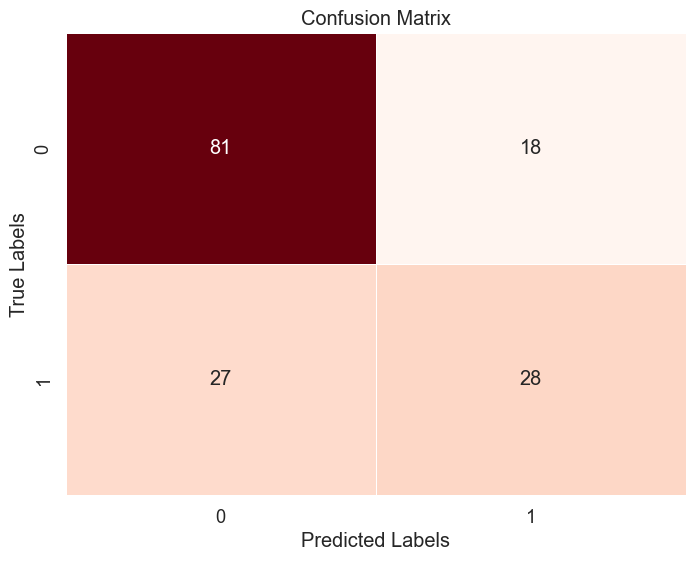

In [69]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred8)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()